In [2]:
"""
Business Understanding

In this code we are looking to determine what amenities make one Airbnb listing more successful than another.  Success is
measured as the percentage of time a property is booked compared to its total amount of time available.  The higher the
percentage of time booked, the more successful the listing.

To determine the amenities that make a difference, we want to answer three questions:
    1.  What amenities are necessary to be competitive in the Airbnb market.
        -   We want to determine must have amenities that most Airbnbs supply, which should be considered essential to 
            include in your listing
    2.  What secondary amenities make the biggest impact on your booking potential.
        -   Other than the amenities that are deemed as essential, are there any additional amenities that make properties
            more popular
    3.  Other than the included amenities, is there anything else that makes a listing successful.
        -   In this we look at all location and room data to determine, past the additional features, what aspects of a
            property improve its success
            
The below code will focus on answering the first and second questions       

"""

'\nBusiness Understanding\n\nIn this code we are looking to determine what amenities make one Airbnb listing more successful than another.  Success is\nmeasured as the percentage of time a property is booked compared to its total amount of time available.  The higher the\npercentage of time booked, the more successful the listing.\n\nTo determine the amenities that make a difference, we want to answer three questions:\n    1.  What amenities are necessary to be competitive in the Airbnb market.\n        -   We want to determine must have amenities that most Airbnbs supply, which should be considered essential to \n            include in your listing\n    2.  What secondary amenities make the biggest impact on your booking potential.\n        -   Other than the amenities that are deemed as essential, are there any additional amenities that make properties\n            more popular\n    3.  Other than the included amenities, is there anything else that makes a listing successful.\n      

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import AllTogether as t
import seaborn as sns
%matplotlib inline

df1 = pd.read_csv(r'C:\Users\mjoe6\PycharmProjects\Udacity\Project1\Seattle Data\listings.csv')
df2 = pd.read_csv(r'C:\Users\mjoe6\PycharmProjects\Udacity\Project1\Seattle Data\calendar.csv')
df3 = pd.read_csv(r'C:\Users\mjoe6\PycharmProjects\Udacity\Project1\Seattle Data\reviews.csv')

In [3]:
'''
Data Prepertation

We will stip any unnecessary symbols from the sting values in the amenities field.

'''

'\nData Prepertation\n\nWe will stip any unnecessary symbols from the sting values in the amenities field.\n\n'

In [4]:
df1['amenities'] = df1['amenities'].map(lambda x: x.lstrip('{').rstrip('}'))

In [5]:
'''
Data preperation

The first thing we need to do is get the succes factor (percent booked)

To do this we create seperate dataframes for days properties are booked vs days they are available.  We then merge these
dataframes and calculate the percentage of time booked.

The new dataframe with the percenatge of time booked is then merged to the listing dataframe.

'''

'\nData preperation\n\nThe first thing we need to do is get the succes factor (percent booked)\n\nTo do this we create seperate dataframes for days properties are booked vs days they are available.  We then merge these\ndataframes and calculate the percentage of time booked.\n\nThe new dataframe with the percenatge of time booked is then merged to the listing dataframe.\n\n'

In [6]:
# Using the calandar.csv file, we will get the percentage of days that a listing is booked out of the total days available

# create seperate datasets for when the available column is set to t and f
days_reserved= df2.loc[df2['available'] == 'f']
days_available= df2.loc[df2['available'] == 't']

# Count how many days a listing is available and not available
days_reserved = days_reserved.groupby(['listing_id'])['available'].value_counts()
days_available = days_available.groupby(['listing_id'])['available'].value_counts()

# convert the datasets to dataframes in order to merge with df1
days_resv_df = days_reserved.to_frame()
days_avail_df = days_available.to_frame()

# create a column for % booked
days_booked_df = days_resv_df.merge(days_avail_df,left_on='listing_id', right_on='listing_id')
days_booked_df.columns = ['Days_Reserved','Days_Available']
days_booked_df['Percent_Booked'] = 100*(days_booked_df.Days_Reserved/(days_booked_df.Days_Reserved +days_booked_df.Days_Available))
days_booked_df.head()

,Days_Reserved,Days_Available,Percent_Booked
listing_id,,,
3335,56,309,15.342466
5682,56,309,15.342466
7369,312,53,85.479452
9460,308,57,84.383562
9531,185,180,50.684932


In [7]:
'''
Data Understanding

Once the data is merged, we look at descriptive statistics to evaluate the different sets of data

'''

'\nData Understanding\n\nOnce the data is merged, we look at descriptive statistics to evaluate the different sets of data\n\n'

In [8]:
# merge the days_booked dataframe containing hte % booked field to the listing df1 datasource
df1 = df1.merge(days_booked_df,left_on='id', right_on='listing_id')


#view df1 data
pd.options.display.max_columns = None
df1.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month,Days_Reserved,Days_Available,Percent_Booked
count,3.045000e+03,3.045000e+03,3.045000e+03,3043.000000,3043.000000,3045.000000,3045.000000,3045.000000,3037.000000,3041.000000,3045.000000,76.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,2592.000000,2583.000000,2588.000000,2584.000000,2589.000000,2585.000000,2584.000000,0.0,3045.000000,2605.000000,3045.000000,3045.000000,3045.000000
mean,5.589792e+06,2.016010e+13,1.567917e+07,7.213605,7.213605,47.628476,-122.333954,3.420361,1.265064,1.320289,1.760263,814.447368,1.694910,2.453530,776.320854,14.367816,32.800985,52.787849,225.639409,24.297537,94.902006,9.666667,9.596213,9.810759,9.829664,9.628627,9.493034,NaN,2.658785,2.254250,139.360591,225.639409,38.180984
std,2.942941e+06,0.000000e+00,1.431515e+07,29.287076,29.287076,0.042452,0.031251,2.007373,0.591475,0.911556,1.171131,611.815013,1.332103,18.219701,1869.017847,11.502014,22.467815,33.087364,121.230696,40.348557,6.288605,0.670849,0.762739,0.553894,0.533963,0.611260,0.723446,NaN,5.020539,1.893815,121.230696,121.230696,33.213889
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.416362,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000,1.000000,1.000000,0.273973
25%,3.294804e+06,2.016010e+13,3.630696e+06,1.000000,1.000000,47.609418,-122.354786,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,60.000000,0.000000,6.000000,20.000000,105.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.790000,22.000000,105.000000,6.027397
50%,6.187340e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623214,-122.330848,3.000000,1.000000,1.000000,1.000000,740.000000,1.000000,2.000000,1125.000000,16.000000,38.000000,63.000000,262.000000,10.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.770000,103.000000,262.000000,28.219178
75%,8.016610e+06,2.016010e+13,2.560233e+07,3.000000,3.000000,47.662097,-122.312101,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,25.000000,54.000000,82.000000,343.000000,29.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.220000,260.000000,343.000000,71.232877
max,1.034016e+07,2.016010e+13,5.306583e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,2750.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,364.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000,364.000000,364.000000,99.726027


In [9]:
'''
Data Preperation

We create a dataframe that will count the different values in the amenities filed and rename the columns to make
more sense

'''

'\nData Preperation\n\nWe create a dataframe that will count the different values in the amenities filed and rename the columns to make\nmore sense\n\n'

In [10]:
study = df1['amenities'].value_counts().reset_index()

In [11]:
' Renaming hte columns in the study datafram to make more sense'
study.rename(columns={'index': 'amenities', 'amenities':'count'}, inplace=True)
study.head

<bound method NDFrame.head of                                               amenities  count
0                                                           27
1     TV,"Cable TV",Internet,"Wireless Internet",Poo...     10
2     TV,"Cable TV",Internet,"Wireless Internet",Kit...      8
3     TV,Internet,"Wireless Internet","Air Condition...      7
4     TV,"Cable TV",Internet,"Wireless Internet","Ai...      7
...                                                 ...    ...
2660  Internet,"Wireless Internet",Kitchen,"Free Par...      1
2661  TV,"Cable TV",Internet,"Wireless Internet",Kit...      1
2662  TV,"Cable TV",Internet,"Wireless Internet","Ai...      1
2663  TV,"Wireless Internet",Kitchen,Heating,Washer,...      1
2664  Internet,"Wireless Internet",Kitchen,"Free Par...      1

[2665 rows x 2 columns]>

In [12]:
'''
Results and evaluation

Question 1: What are the essential amenities to be a successful Airbnb

From this analysis, we will see that the top 5 most frequently occuring amenities in the listings, which you should
ensure are included in your listing to be competitive, are:

1. Internet
2. Wireless Internet
3. Heating
4. Kitchen 
5. Smoke Detector


'''

'\nResults and evaluation\n\nQuestion 1: What are the essential amenities to be a successful Airbnb\n\nFrom this analysis, we will see that the top 5 most frequently occuring amenities in the listings, which you should\nensure are included in your listing to be competitive, are:\n\n1. Internet\n2. Wireless Internet\n3. Heating\n4. Kitchen \n5. Smoke Detector\n\n\n'

In [13]:
' create a field of possible values to evaluate from the amenities field'
possible_vals = ["24-Hour Check-in","Air Conditioning","Breakfast","Buzzer/Wireless Intercom","Cable TV","Carbon Monoxide Detector","Cat(s)","Dog(s)","Doorman","Dryer","Elevator in Building","Essentials","Family/Kid Friendly","Fire Extinguisher","First Aid Kit","Free Parking on Premises","Gym","Hair Dryer","Hangers","Heating","Hot Tub","Indoor Fireplace","Internet","Iron","Kitchen","Lock on Bedroom Door","Other pet(s)","Pets Allowed","Pets live on this property","Pool","Safety Card","Shampoo","Smoke Detector","Smoking Allowed","Suitable for Events","Washer","Washer / Dryer","Wheelchair Accessible","Wireless Internet","No Amenities"]

In [14]:
def total_count(df, col1, col2, look_for):
    '''
This funciton will output a dataframe of each amenity with the count of how ofter it shows up

    Input:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings ou want to serach for in each row of df[col]
    
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how ofter it shows up
    '''
    
    from collections import defaultdict
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1,col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [15]:
study_df = total_count(study,'amenities','count', possible_vals)
study_df

,amenities,count
22,Internet,2963
38,Wireless Internet,2942
19,Heating,2909
24,Kitchen,2751
32,Smoke Detector,2676
11,Essentials,2646
9,Dryer,2515
35,Washer,2400
31,Shampoo,2188
5,Carbon Monoxide Detector,2061


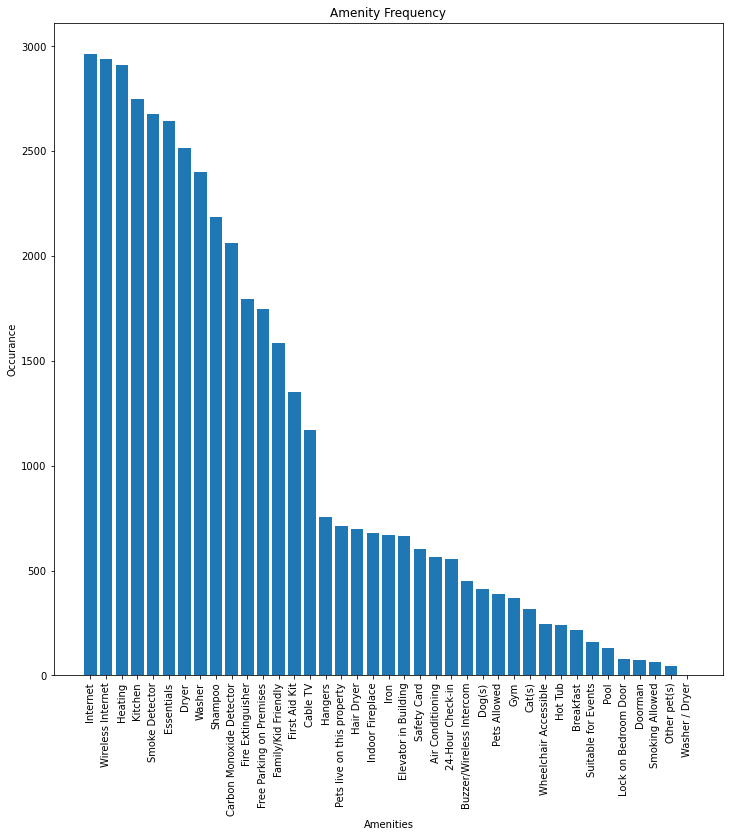

In [47]:
plt.figure(figsize=(12,12))
plt.bar(study_df['amenities'],study_df['count'])
plt.title('Amenity Frequency')
plt.xlabel('Amenities')
plt.ylabel('Occurance')
ax = plt.gca()

ax.tick_params(axis='x', labelrotation = 90)

plt.show()

In [48]:
' add a percentage the study dataframe'
study_df['perc'] = study_df['count']/np.sum(study_df['count'])
study_df

,amenities,count,perc
22,Internet,2963,0.069239
38,Wireless Internet,2942,0.068748
19,Heating,2909,0.067977
24,Kitchen,2751,0.064285
32,Smoke Detector,2676,0.062532
11,Essentials,2646,0.061831
9,Dryer,2515,0.058770
35,Washer,2400,0.056083
31,Shampoo,2188,0.051129
5,Carbon Monoxide Detector,2061,0.048161


In [49]:
'''
Results and evaluation

Question 2: What additional amenites make the biggest impact on your success 

We perform a correlation analysis to determine what additional amenities make the biggest impact on booking percentage.

The top 5 additional amenities to include (if possible) are:
1. Wheelchair accessible
2. Lock on bedroom door
3. Elevator in Building
4. Buzzer/Wireless Intercom
5. Doorman

'''

'\nResults and evaluation\n\nQuestion 2: What additional amenites make the biggest impact on your success \n\nWe perform a correlation analysis to determine what additional amenities make the biggest impact on booking percentage.\n\nThe top 5 additional amenities to include (if possible) are:\n1. Wheelchair accessible\n2. Lock on bedroom door\n3. Elevator in Building\n4. Buzzer/Wireless Intercom\n5. Doorman\n\n'

In [50]:
def mean_amt(df, col_name, col_mean, look_for):
    '''
    This function will evaluate the mean percent of days booked for different amenities available to determine which, if any,
    amenities help get an airbnd property booked more frequently.

    df - the pandas dataframe you want to search
    col_name - the column name you want to look through
    col_count - the column ou want to count values from
    col_mean - the column you want the mean amount for
    look_for - a list of strings you want to seach for in ach row of df[col]

    '''
    from collections import defaultdict
    new_df = defaultdict(int)
    squares_df = defaultdict(int)
    denoms = dict()
    for val in look_for:
        denoms[val] = 0
        for idx in range(df.shape[0]):
            if df[col_name].isnull()[idx] == False:
                if val in df[col_name][idx] and df[col_mean][idx] > 0:
                    new_df[val] += df[col_mean][idx]
                    squares_df[val] += df[col_mean][idx]**2
                    denoms[val] += 1
    # Turn into dataframes
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    squares_df = pd.DataFrame(pd.Series(squares_df)).reset_index()
    denoms = pd.DataFrame(pd.Series(denoms)).reset_index()

    # Change column names
    new_df.columns = [col_name, 'col_sum']
    squares_df.columns = [col_name, 'col_squares']
    denoms.columns = [col_name, 'col_total']

    # Merge DataFrames
    df_means = pd.merge(new_df, denoms)
    df_all = pd.merge(df_means, squares_df)

    # Additional columns needed for analysis
    df_all['mean_col'] = df_means['col_sum']/df_means['col_total']
    df_all['var_col'] = df_all['col_squares']/df_all['col_total']-df_all['mean_col']**2
    df_all['std_col'] = np.sqrt(df_all['var_col'])
    df_all['lower_95']=df_all['mean_col']-1.96*df_all['std_col']/np.sqrt(df_all['col_total'])
    df_all['upper_95']=df_all['mean_col']+1.96*df_all['std_col']/np.sqrt(df_all['col_total'])
    return df_all

In [51]:
df_all = mean_amt(df1, 'amenities', 'Percent_Booked', possible_vals)


In [52]:
df_all.sort_values('mean_col', ascending=False)

,amenities,col_sum,col_total,col_squares,mean_col,var_col,std_col,lower_95,upper_95
37,Wheelchair Accessible,10806.027397,245,7.101700e+05,44.106234,953.293213,30.875447,40.240017,47.972452
25,Lock on Bedroom Door,3384.383562,79,2.484158e+05,42.840298,1309.212173,36.183037,34.861315,50.819281
10,Elevator in Building,28297.534247,664,1.955359e+06,42.616768,1128.628787,33.595071,40.061435,45.172102
3,Buzzer/Wireless Intercom,18967.671233,449,1.252340e+06,42.244257,1004.598786,31.695406,39.312491,45.176022
8,Doorman,3036.712329,72,2.023847e+05,42.176560,1032.036215,32.125320,34.755990,49.597131
30,Safety Card,24667.671233,604,1.624160e+06,40.840515,1021.059356,31.954019,38.292142,43.388889
16,Gym,14808.493151,370,1.000396e+06,40.022954,1101.937162,33.195439,36.640487,43.405422
18,Hangers,29455.068493,755,2.036080e+06,39.013336,1174.753858,34.274682,36.568464,41.458207
24,Kitchen,106426.301370,2751,7.144466e+06,38.686405,1100.405283,33.172357,37.446790,39.926021
0,24-Hour Check-in,21465.753425,555,1.487402e+06,38.677033,1184.090822,34.410621,35.814160,41.539906


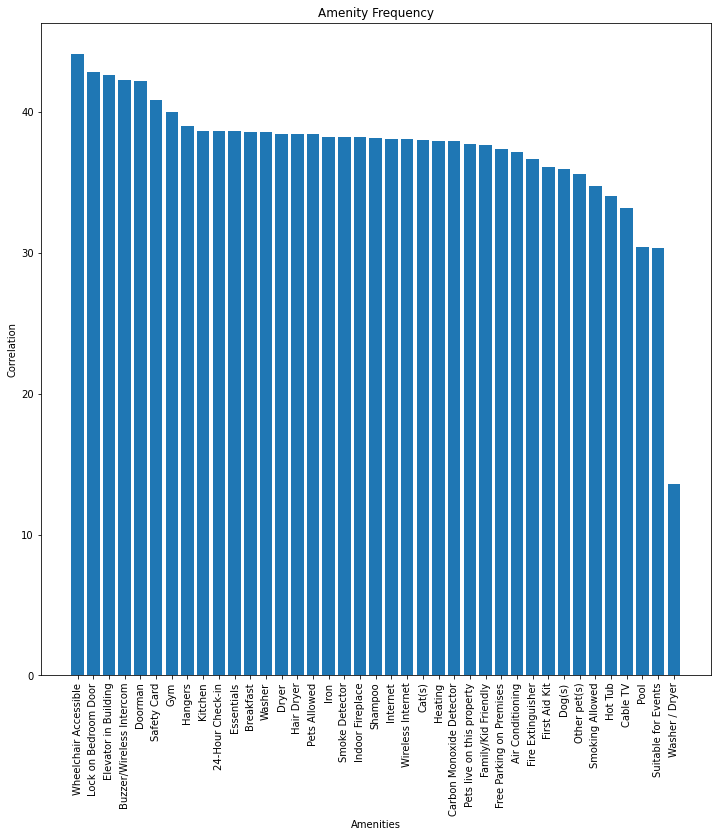

In [56]:
df_all = df_all.sort_values('mean_col', ascending=False)

plt.figure(figsize=(12,12))
plt.bar(df_all['amenities'],df_all['mean_col'])
plt.title('Amenity Frequency')
plt.xlabel('Amenities')
plt.ylabel('Correlation')
ax = plt.gca()

ax.tick_params(axis='x', labelrotation = 90)

plt.show()